# Toxic Dataset with Linear Model

Base on the language, how will a tf-idf and linear regression model perform?

## Dependencies

In [1]:
# BASICS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DATA
from data.process_data import load_train_data, load_test_data, load_data

# MODEL
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

# EVALUATIONS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# helper function
def plot_cm(y_test, y_test_pred, name, labels=[1, 2, 3, 4, 5]):
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_df, annot=True, cmap=plt.get_cmap('Blues'), fmt="d")
    plt.title("Confusion Matrix of " + name)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

## Loading Data

In [3]:
%%time
X_train, X_test, y_train, y_test = load_data()

CPU times: user 2min 16s, sys: 502 ms, total: 2min 17s
Wall time: 2min 17s


## Construct Model

In [4]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(decode_error='ignore')),
    ('SVD', TruncatedSVD(100)),
    ('log_clf', LogisticRegression(n_jobs = -1))
])

In [5]:
%%time
model.fit(X_train, y_train)

CPU times: user 13.9 s, sys: 2.49 s, total: 16.4 s
Wall time: 4.67 s


Pipeline(steps=[('tfidf', TfidfVectorizer(decode_error='ignore')),
                ('SVD', TruncatedSVD(n_components=100)),
                ('log_clf', LogisticRegression(n_jobs=-1))])

## Evaluate the Result

In [6]:
%%time
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

CPU times: user 989 ms, sys: 15.9 ms, total: 1 s
Wall time: 1 s


In [7]:
# train acc
accuracy_score(y_train, y_train_pred)

0.8543928543928544

In [8]:
# test acc
accuracy_score(y_test, y_test_pred)

0.8465003465003464

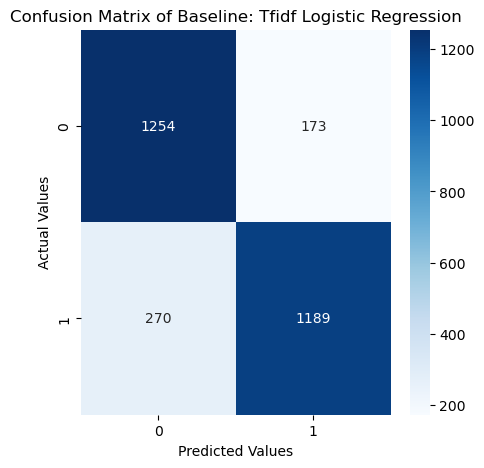

In [9]:
plot_cm(y_test, y_test_pred, "Baseline: Tfidf Logistic Regression", [0, 1])